## 最小二乘的一些理论
- 可参考 materials/ch2.pdf
- 优化估计
  + 选择模型的参数 $\hat\theta$，使得模型对数据有最优解释。
    * 三个概念
      - 模型
      - 目标
      - 优化
      $$\hat\theta=\arg\min_{\theta}L_i(f_{\theta}(x_i,\theta), y_i)$$
- 最小二乘
  $$\hat\theta=\arg\min_{\theta}\sum_{i-1}^n(f_{\theta}(x_i)-y_i)^2$$
  
```bash
jupyter-nbconvert julia-01-least-square.ipynb --to slides --post serve # to view slide mode
```

## 线性模型最小二乘估计
  $$y_i = \sum_{j=1}^{m}x_{ij}\theta_j+e_i$$
- 方程组表示
  $$\left[\begin{array}{c}y_1\\ \vdots\\ y_n\end{array}\right]=\left[\begin{array}{ccc}x_{11} & \cdots & x_{1m}\\\vdots & \ddots & \vdots\\ x_{n1} & \cdots & x_{nm}\end{array}\right]\left[\begin{array}{c}\theta_1\\\vdots\\\theta_m\end{array}\right]+\left[\begin{array}{c}e_1\\ \vdots\\ e_n\end{array}\right]$$
  或者
  $$\mathbf{y=X\theta+e}$$

### 目标
- 令 $\sum(e_i^2)$ 最小
- 或者说，我们要寻找 $\hat{\theta}$, 使得 $\sum(y_i-\mathbf{x\theta})^2$, 或者 $\mathbf{(y-X\theta)'(y-X\theta)}$，最小


### 优化
- 以上二次式对 $\mathbf{\theta}$ 一阶导数为零时有唯一解。


#### 示例
- 当 $\theta$ 中有一个参数 $b$
  + 优化函数 $L$ 为：
    $$\begin{array}{rcl}L & = & \sum_i^n(y_i-x_ib)^2\\
                          & = & \sum_i^n(y_i^2-2x_iy_ib+x_i^2b^2)
      \end{array}$$
  + 对 $b$ 求导
    $$L'=\sum_i^n(2x_i^2b-2x_iy_i)$$
  + 令 $L'=0$
      $$b=\frac{\sum x_iy_i}{\sum x_i^2}$$

- 当 $\theta$ 中有两个参数 $b_1,\,b_2$
  + 优化函数 $L$:
    $$\begin{array}{rcl}
            L & = & \sum_i^n(y_i-x_{i1}b_1-x_{i2}b_2)^2\\
              & = & \sum_i^n(y_i^2 + x_{i1}^2b_1^2 + x_{i2}^2b_2^2\\
              &   & \quad + 2x_{i1}x_{i2}b_1b_2 - 2x_{i1}y_ib_1 - 2x_{i2}y_ib_2)^2\end{array}$$
  + 分别对 $b_1$ 和 $b_2$ 求导
    $$\left\{\begin{array}{rcl}
      L_{b_1}' & = & \sum(2x_{i1}^2b_1+2x_{i1}x_{i2}b_2-2x_{i1}y_i)\\
      L_{b_2}' & = & \sum(2x_{i2}^2b_2+2x_{i1}x_{i2}b_1-2x_{i2}y_i)
      \end{array}\right.$$
  + 令 $L_{b_1}' = L_{b_2}' = 0$
    $$\left\{\begin{array}{rcrcl}
      (\sum x_{i1}^2)b_1 &+& (\sum x_{i1}x_{i2}) b_2 &=& \sum x_{i1}y_i\\
      (\sum x_{i1}x_{i2})b_1 &+& (\sum x_{i2}^2)b_2 &=& \sum x_{i2}y_i
      \end{array}\right.$$
  + 显而易见，以上即方程组
    $$ (\mathbf{X'X})\mathbf{b} = \mathbf{Xy} $$
  + 它的解即为：
    $$\hat{\theta} = \mathbf{b} = (\mathbf{X}'\mathbf{X})^{-1}\mathbf{Xy}$$

## 数值模拟

- 假定有一种简单生物
  + 某个群体中只有 10 个 SNP 座位会发生突变。
  - 假定没有显性效应和上位效应，也假定没有其它固定效应。
  - 假定群体的表型的平均值为零。
  
  
- 则这个群体中每个个体的表型模型：
  $$y_i=\sum_{m=1}^{10}g_{im}b_m + e_i$$

### 其它事实和假设
- 如果没有基因型缺失，个体 $i$ 第 $m$ 座位的 SNP 基因型 $g_{im}$ 只有三种类型，可以用 0, 1, 或 2 表示。
- 每个座位的基因型效应通常假定服从拉普拉斯分布，又称双指数分布
- 一般假定 $e_i\stackrel{\mathrm{iid}}{\sim}N(0,\,\sigma_e^2)$


### 模拟过程
- 以下模拟，我们先导入必要的 Julia 库
- 以及必要的参数

In [53]:
using Plots, LinearAlgebra, Distributions, Statistics

nid, nlc = 1000, 10
基因型 = rand(0:2, nid, nlc)
println(基因型[1:5, :])

[1 1 2 0 0 2 2 2 2 2; 1 2 1 0 0 1 2 2 1 2; 2 2 2 2 1 2 0 1 0 2; 0 2 0 0 0 0 2 0 0 0; 1 0 0 2 2 0 0 2 2 1]


In [54]:
# 十个基因座位的效应
μ, λ = 0, 1
效应 = rand(Laplace(μ, λ), nlc)

10-element Array{Float64,1}:
 -0.3979617685612337  
 -2.2391495361075098  
  0.6844092569589844  
 -0.8449637173710366  
 -1.0908138353146626  
 -0.15538364710619615 
  1.8656593576843992  
 -2.4348290673000075  
 -0.004200938586167778
 -0.5066557627479963  

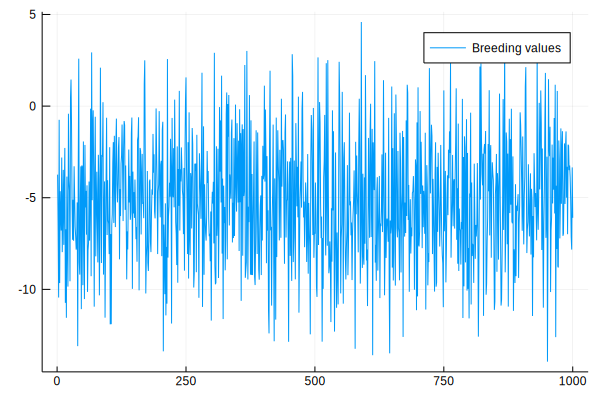

In [55]:
# 每个个体的基因型值，或育种值
育种值 = 基因型 * 效应
f1 = plot(育种值, label="Breeding values")

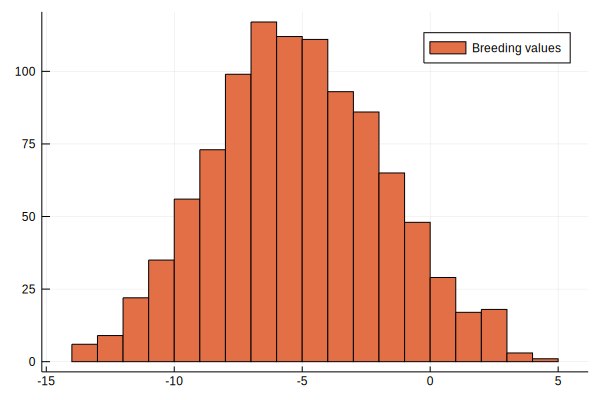

In [56]:
f2 = histogram(育种值, label="Breeding values", color=2)

In [57]:
h2 = 0.3
遗传方差 = var(育种值)
环境方差 = 遗传方差 / (1 - 0.3)*0.7
环境效应 = rand(Normal(0, √环境方差), nid)
表现型 = 育种值 + 环境效应
println(表现型[1:5])

[-10.055582588838146, -5.891314876048205, -13.544815611079828, 3.6765705465953, -14.828496382519578]


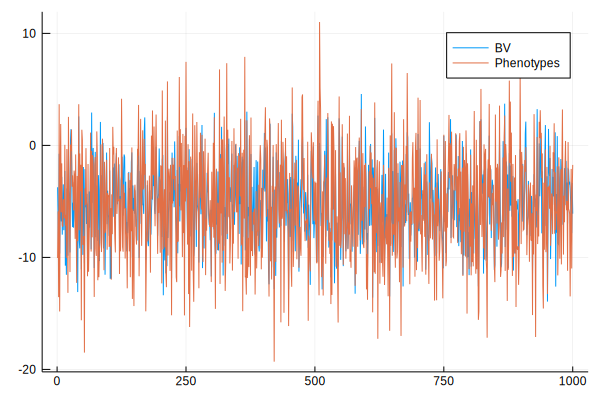

In [58]:
f3 = plot([育种值 表现型], label=["BV", "Phenotypes"])

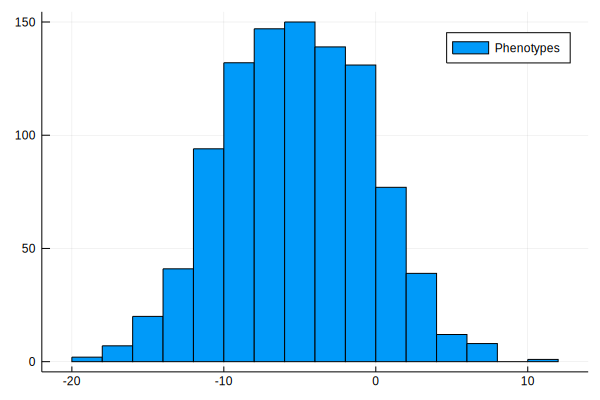

In [59]:
f4 = histogram(表现型, label="Phenotypes")

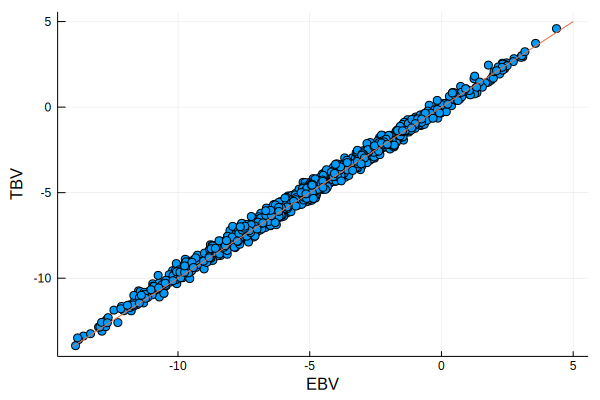

In [63]:
# 育种值估计
XX = 基因型'基因型
XXI = inv(XX)
XY = 基因型'表现型
估计效应 = XXI * XY
估计育种值 = 基因型 * 估计效应
f5 = scatter(估计育种值, 育种值, xlabel="EBV", ylabel="TBV", leg=false)
plot!(f5, [-14, 5], [-14, 5])

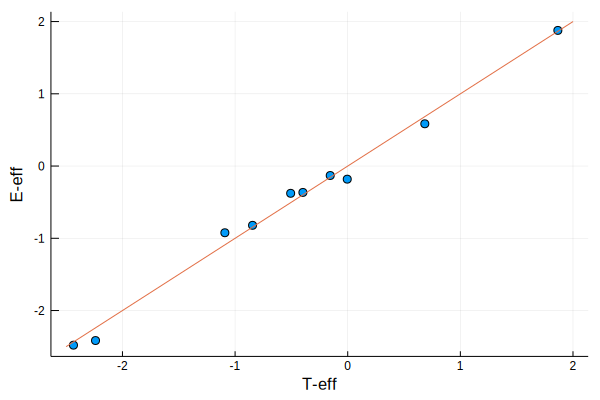

In [64]:
f6 = scatter(效应, 估计效应, xlabel="T-eff", ylabel="E-eff", legend=false)
plot!(f6, [-2.5, 2], [-2.5, 2])

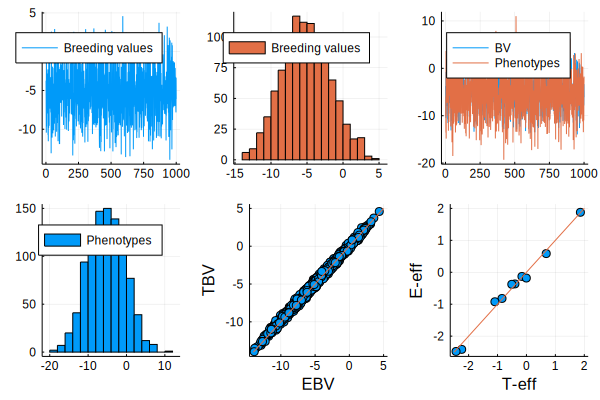

In [65]:
plot(f1, f2, f3, f4, f5, f6, layout=(2,3))
# use dpi = 300 for publicatons

## 练习
- 已知遗传力
  $h^2=\frac{\mathrm{Var}(G)}{\mathrm{Var}(P)}$  
  试求以上群体该性状的遗传力
- 尝试不同的参数，$\sigma, N_{\mathrm{ID}}, N_{\mathrm{Marker}}$, 如：
  - 如果误差标准差 $\sigma=10$ 以上结果怎样？
  - 如果只有 20 个个体，结果怎样？试模拟 1000 个体，500 座位。
- 按照以上基因型效应向量，群体中可能的超级个体，即每个座位的基因型最优，的育种值是多少？（假定育种值越大越好。）
- 按照你的育种值估计结果，如果将 1000 个体中最好的 10 个体留种，那么选择之后的超级个体的育种值是多少？

## 关于基础群体模拟
- 一般在模拟群体时需要用到所谓的“理想群体”
- 理想群体是处在突变-漂变平衡的群体，又称 Fisher-Wright 理想群体
  + https://en.wikipedia.org/wiki/Idealised_population
- 一般有两种模拟方法，
  + Coancestor method
  + Forward simulator
- 本笔记本中的模拟仅用做演示


## 现实世界
- $N_{marker}\gg N_{ID}\Longrightarrow$ N-P Hard
- 这样以上的最小二乘就不能用于基因座位效应估计
- 于是有各种贝叶斯方法
- 我们后面会再次提及。

## 关于模拟
- 可一个根据不同的统计模型产生（生物学）数据
- 可以用来演示针对这样的数据而采用的各种估计方法
- 可以利用多次重复模拟来评判估计方法
- 可以用于教育目的
  + 数据是“干净”的，同学们无需“准备”数据
  + 数据结构可以控制
- 有各种模拟方法
  + 蒙特·卡洛模拟
  + 马尔科夫链蒙特·卡洛方法
  + 等等